In [3]:
!pip install prophet
# prophet is a easy to use library to make most accurate forecast with minimal tuning especially for seasonal data( weekly ,daily)
# always save ds for date stamp and value for prediction of value

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

In [5]:
df=pd.read_csv(r'/content/DailyDelhiClimateTrain.csv')

In [34]:
test_df=pd.read_csv('/content/DailyDelhiClimateTrain.csv')

In [5]:
df

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [6]:
df.columns

Index(['date', 'meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')

In [6]:
meantemp_df=df[['date','meantemp']]

In [38]:
mean_testdf

,date,meantemp
0,2013-01-01,10.000000
1,2013-01-02,7.400000
2,2013-01-03,7.166667
3,2013-01-04,8.666667
4,2013-01-05,6.000000
...,...,...
1457,2016-12-28,17.217391
1458,2016-12-29,15.238095
1459,2016-12-30,14.095238
1460,2016-12-31,15.052632


In [7]:
meantemp_df

,date,meantemp
0,2013-01-01,10.000000
1,2013-01-02,7.400000
2,2013-01-03,7.166667
3,2013-01-04,8.666667
4,2013-01-05,6.000000
...,...,...
1457,2016-12-28,17.217391
1458,2016-12-29,15.238095
1459,2016-12-30,14.095238
1460,2016-12-31,15.052632


In [8]:
!pip install plotly
#install Plotly to create interactive, high-quality visualizations in Python — especially useful for data analysis, dashboards, and time series plots.
#Actual vs predicted values
#...all with interactive zooming and hover details.


#Data Cleaning

In [9]:
import plotly.express as px
# when u hover over graphs oe any specific point of graph plotly show values

In [10]:
fig=px.line(meantemp_df,x='date',y='meantemp',title='Temperature in Delhi')
fig.show()

In [11]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

# Sample Data (replace with your actual meantemp_df)
# Let's create some dummy data to illustrate the improvements
dates = pd.to_datetime(pd.date_range(start='2023-01-01', periods=365, freq='D'))
meantemps = [20 + 15 * (0.5 * (1 + (i/365)**2)) * (1 + 0.5 * (i%30)/30) + 5 * (0.5 - (i%7)/7) for i in range(365)]
meantemp_df = pd.DataFrame({'date': dates, 'meantemp': meantemps})
# Add a month column for potential use in color or animation
meantemp_df['month'] = meantemp_df['date'].dt.month_name()

# Initial plot (as you provided)
fig = px.line(meantemp_df, x='date', y='meantemp', title='Temperature in Delhi')

# --- Making it more attractive ---

# 1. Customizing the line
fig.update_traces(
    line_color='darkred',  # A more distinctive color
    line_width=2.5,        # Slightly thicker line
    # mode='lines+markers', # Optional: add markers for individual points
    # marker_size=4
)

# 2. Enhancing the Title
fig.update_layout(
    title_text='<b>Daily Mean Temperature in Delhi</b>', # Bold title
    title_x=0.5,                                      # Center the title
    title_font=dict(size=24, color='darkblue', family="Arial"), # Custom font and size
    hovermode='x unified' # Unify hover information across all traces on the x-axis
)

# 3. Improving Axes
fig.update_xaxes(
    title_text='Date',
    title_font=dict(size=16, family='Arial', color='dimgray'),
    tickfont=dict(size=12, family='Arial', color='gray'),
    showgrid=True,        # Show gridlines
    gridcolor='lightgray', # Light color for gridlines
    griddash='dot',       # Dotted gridlines
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    ),
    rangeslider_visible=True, # Add a range slider for easy zooming
    rangeselector_visible=True # Add range selector buttons
)

fig.update_yaxes(
    title_text='Mean Temperature (°C)', # More descriptive Y-axis title
    title_font=dict(size=16, family='Arial', color='dimgray'),
    tickfont=dict(size=12, family='Arial', color='gray'),
    showgrid=True,
    gridcolor='lightgray',
    griddash='dot',
    zeroline=True,         # Show the zero line
    zerolinecolor='lightgray'
)

# 4. Background and Margins
fig.update_layout(
    plot_bgcolor='white',    # White plot background
    paper_bgcolor='lightgoldenrodyellow', # Light background for the entire figure
    margin=dict(l=80, r=80, t=100, b=80), # Adjust margins
)

# 5. Adding Annotations or Shapes (Example: High/Low Temperature Annotations)
# You might need to programmatically find these or define them manually
# For demonstration, let's pick a couple of points
max_temp_date = meantemp_df.loc[meantemp_df['meantemp'].idxmax()]['date']
max_temp_val = meantemp_df['meantemp'].max()
min_temp_date = meantemp_df.loc[meantemp_df['meantemp'].idxmin()]['date']
min_temp_val = meantemp_df['meantemp'].min()

fig.add_annotation(
    x=max_temp_date,
    y=max_temp_val,
    text=f"Max: {max_temp_val:.1f}°C",
    showarrow=True,
    arrowhead=1,
    arrowcolor='red',
    font=dict(color='red', size=10),
    yshift=10
)

fig.add_annotation(
    x=min_temp_date,
    y=min_temp_val,
    text=f"Min: {min_temp_val:.1f}°C",
    showarrow=True,
    arrowhead=1,
    arrowcolor='blue',
    font=dict(color='blue', size=10),
    yshift=-10
)

# 6. Adding a range slider (already included in update_xaxes)
# 7. Adding a logo or watermark (more complex, usually done with images, but possible)
# fig.add_layout_image(...)

# 8. Interactive Features (already largely handled by Plotly Express defaults)
# - Hover details (controlled by hovermode)
# - Zooming/Panning (controlled by range slider/selector, or default interactions)

# 9. Using a different Plotly Express theme (if you want a quick change)
# You can add template='plotly_dark' or 'plotly_white' etc. to px.line or update_layout
# fig.update_layout(template='plotly_white') # or 'plotly_dark', 'ggplot2', 'seaborn', 'simple_white', 'none'

# 10. Conditional formatting (e.g., coloring the line based on temperature ranges)
# This is a bit more involved and might require creating multiple traces or using px.scatter with a continuous color scale,
# or for a line, you might need to use go.Scatter and define segments.
# For simplicity, let's stick to a single line color.

# Display the figure
fig.show()

In [16]:
meantemp_df.rename(columns={'date':'ds','meantemp':'y'},inplace=True)

In [17]:
meantemp_df

,ds,y,month
0,2023-01-01,30.000000,January
1,2023-01-02,29.410772,January
2,2023-01-03,28.821661,January
3,2023-01-04,28.232675,January
4,2023-01-05,27.643818,January
...,...,...,...
360,2023-12-27,35.153071,December
361,2023-12-28,34.726650,December
362,2023-12-29,34.301698,December
363,2023-12-30,33.878221,December


In [18]:
meantemp_df.drop('month',axis=1,inplace=True)

In [19]:
m=Prophet()
m.fit(meantemp_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzhj4fx68/9tt0_efq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzhj4fx68/q7rtqfv0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80938', 'data', 'file=/tmp/tmpzhj4fx68/9tt0_efq.json', 'init=/tmp/tmpzhj4fx68/q7rtqfv0.json', 'output', 'file=/tmp/tmpzhj4fx68/prophet_model_iesjtsu/prophet_model-20250629131459.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:14:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:14:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [20]:
min(meantemp_df['ds'])

Timestamp('2023-01-01 00:00:00')

In [21]:
max(meantemp_df['ds'])

Timestamp('2023-12-31 00:00:00')

In [39]:
future=m.make_future_dataframe(periods=99)


In [40]:
future.tail(2)

,ds
462,2024-04-07
463,2024-04-08


In [41]:
forecast=m.predict(future)

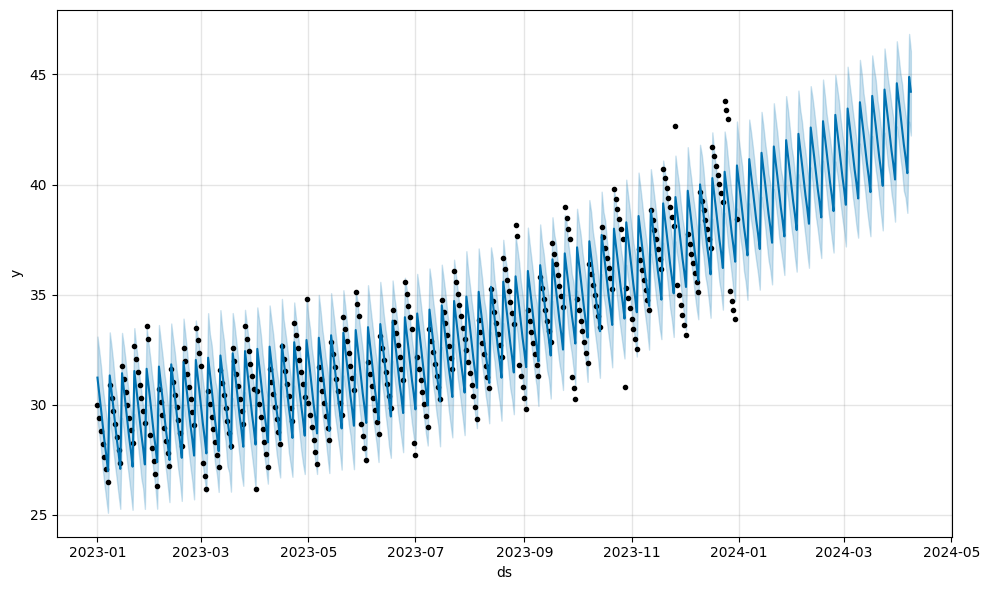

In [42]:
fig=m.plot(forecast)
fig.show()

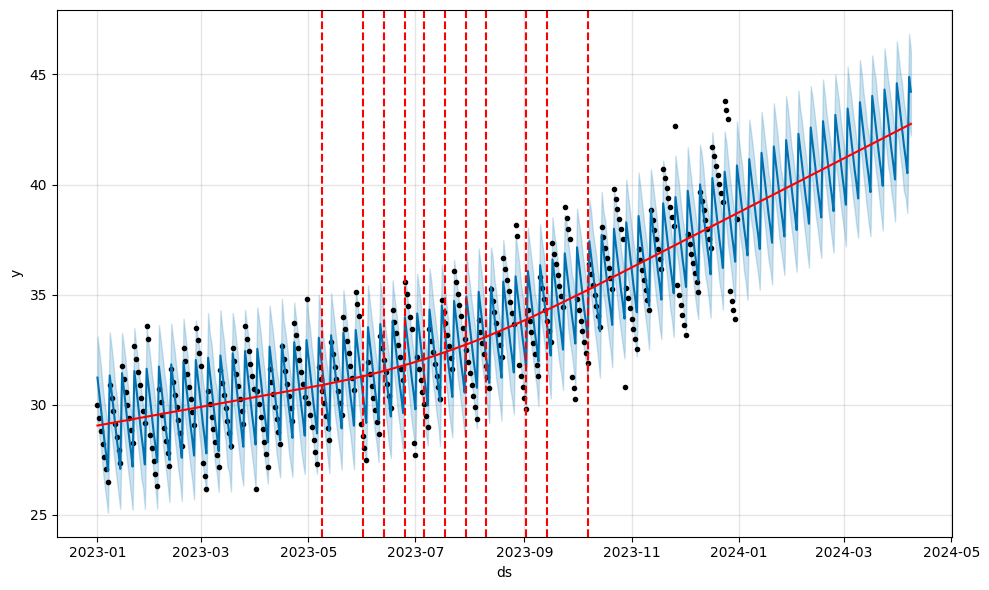

In [43]:
from prophet.plot import plot_plotly,plot_components_plotly,add_changepoints_to_plot

fig=m.plot(forecast)
a=add_changepoints_to_plot(fig.gca(),m,forecast)
# adding the point where model is shifting meaning from curve part the trend is changing


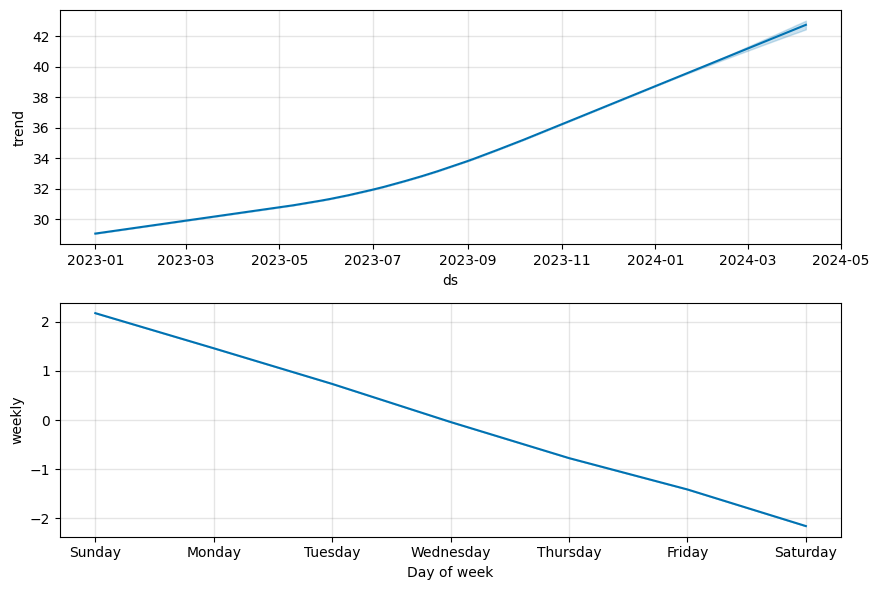

In [44]:
fig=m.plot_components(forecast)

In [46]:
from prophet.diagnostics import cross_validation,performance_metrics

It performs rolling-origin evaluation:

Step 1: Use the first 90 days → train model → forecast next 10 days

Step 2: Add 10 more days to training → forecast next 10 days

Step 3: Repeat until the end of your dataset

In [57]:
df_cv=cross_validation(m,initial='90 days',period='90 days',horizon='10 days')

INFO:prophet:Making 3 forecasts with cutoffs between 2023-06-24 00:00:00 and 2023-12-21 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpzhj4fx68/x2q34nkb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzhj4fx68/rt7bsvfz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50020', 'data', 'file=/tmp/tmpzhj4fx68/x2q34nkb.json', 'init=/tmp/tmpzhj4fx68/rt7bsvfz.json', 'output', 'file=/tmp/tmpzhj4fx68/prophet_modelnb37qu34/prophet_model-20250629144137.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:41:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:41:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzhj4fx68/58547zvd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzhj4fx68/cfn41o2t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [58]:
df_p=performance_metrics(df_cv)

# mape < 10 %: very accurate forecasting
# mape < 20 %: good forecasting
# mape < 50 %: reasonable forecasting
# mape >= 50 %: inaccurate forecasting

In [59]:
df_p.head(10)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,1 days,4.684870,2.164456,2.122085,0.057754,0.060246,0.059515,0.0
1,2 days,5.808985,2.410184,2.364101,0.062279,0.059071,0.064335,0.0
2,3 days,6.767842,2.601508,2.555658,0.065075,0.064205,0.067284,0.0
3,4 days,8.289379,2.879128,2.830417,0.072983,0.072943,0.075770,0.0
4,5 days,9.596165,3.097768,3.045370,0.079511,0.078588,0.082828,0.0
5,6 days,7.973928,2.823814,2.780011,0.087421,0.086062,0.083734,0.0
6,7 days,6.820798,2.611666,2.571369,0.082121,0.081886,0.078860,0.0
7,8 days,5.834012,2.415370,2.377825,0.073528,0.076304,0.070867,0.0
8,9 days,4.739075,2.176942,2.142914,0.063904,0.060096,0.061879,0.0
9,10 days,3.971676,1.992907,1.958478,0.056075,0.056222,0.054531,0.0
